# load the dataset:

In [6]:
# Import necessary libraries (without numpy)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print("First 5 rows of the dataset:")
print(titanic.head())
print("\nDataset shape:", titanic.shape)
print(" info:")
print(titanic.info())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

# data cleaning:

In [11]:
# Drop unnecessary columns
titanic_clean = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
titanic_clean['Age'] = titanic_clean['Age'].fillna(titanic_clean['Age'].median())
titanic_clean['Embarked'] = titanic_clean['Embarked'].fillna(titanic_clean['Embarked'].mode()[0])

# Convert 'Sex' to numerical values
titanic_clean['Sex'] = titanic_clean['Sex'].map({'male': 0, 'female': 1})

print("\nMissing values after cleaning:")
print(titanic_clean.isnull().sum())


Missing values after cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [13]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [15]:
print("missing values after cleaning:")
print(df.isnull().sum().sum())

missing values after cleaning:
0


# EDA and visualization:

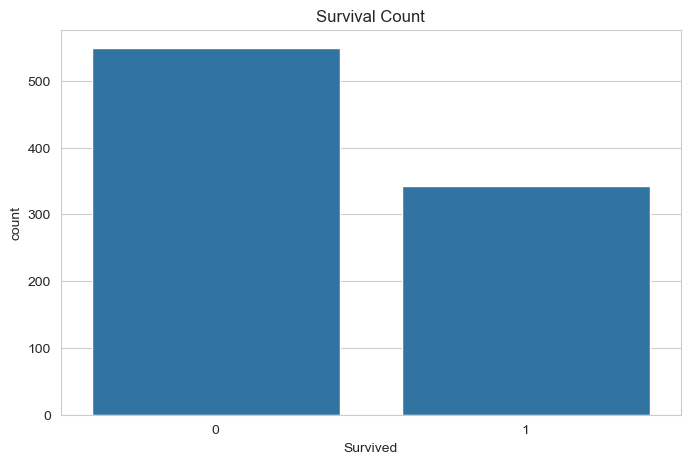

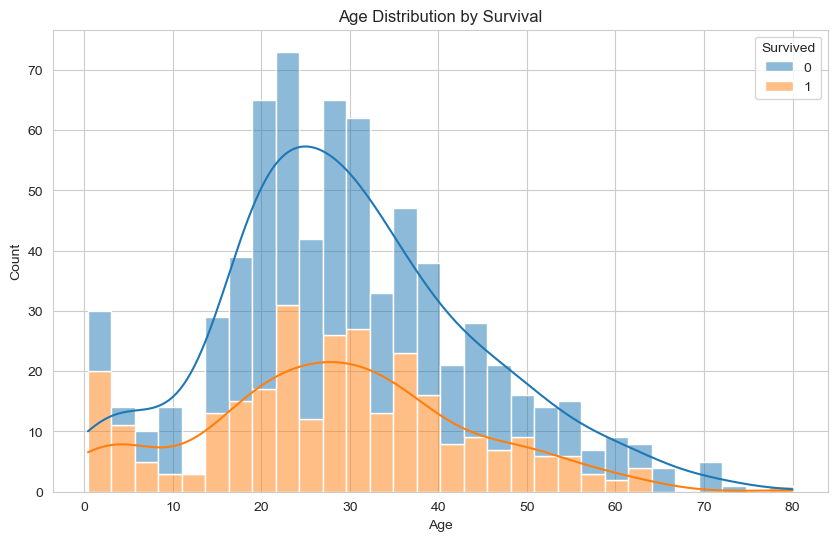

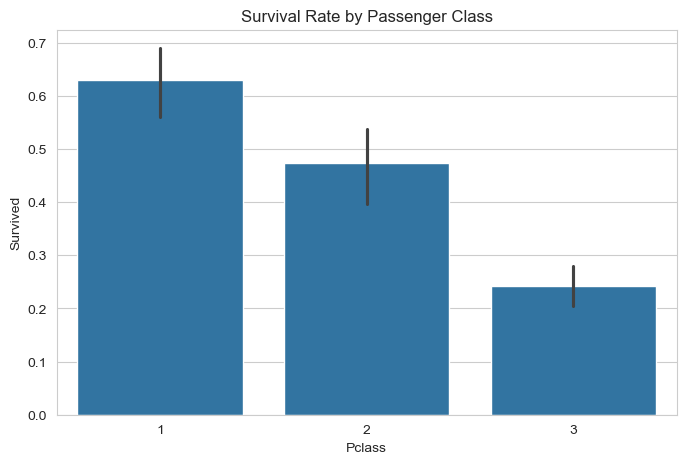

NameError: name 'corr_matrix' is not defined

<Figure size 1200x800 with 0 Axes>

In [37]:

# Set style for plots
sns.set_style('whitegrid')

# Plot survival count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

# Plot age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

# Plot survival rate by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# data preparation for modeling:

In [21]:
# Split into features and target
X = titanic_clean.drop('Survived', axis=1)
y = titanic_clean['Survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (712, 7)
Test set shape: (179, 7)


# Train and evalute the model:

In [24]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Create pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', model)])
    
    # Train model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.798883   0.779412  0.716216  0.746479
Decision Tree        0.776536   0.717949  0.756757  0.736842
Random Forest        0.810056   0.777778  0.756757  0.767123


# comparison between models:

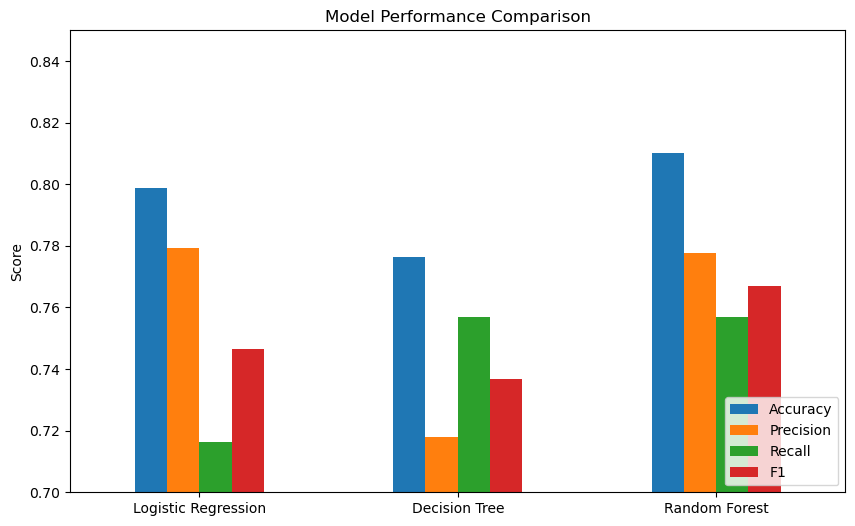


Best performing model: Random Forest

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [27]:
# Plot model comparison
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.7, 0.85)
plt.legend(loc='lower right')
plt.show()

# Best model analysis
best_model_name = results_df['Accuracy'].idxmax()
print(f"\nBest performing model: {best_model_name}")
print("\nClassification Report for Random Forest:")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_rf))